## Time series visualization using Bar, box and line charts

In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
# Importing the data - freecodecamp forum pageview
df = pd.read_csv('/content/fcc-forum-pageviews.csv')

In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
#Clean the data by filtering out days when the page
#views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
import pandas as pd



# Calculate the thresholds for the top and bottom 2.5% of page views
top_threshold = df['value'].quantile(0.975)
bottom_threshold = df['value'].quantile(0.025)

# Filter out days with page views in the top 2.5%
f_data = df[(df['value'] < top_threshold) & (df['value'] > bottom_threshold)]

# Now filtered_data contains only the rows where page views are not in the top or bottom 2.5%


In [5]:
f_data

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


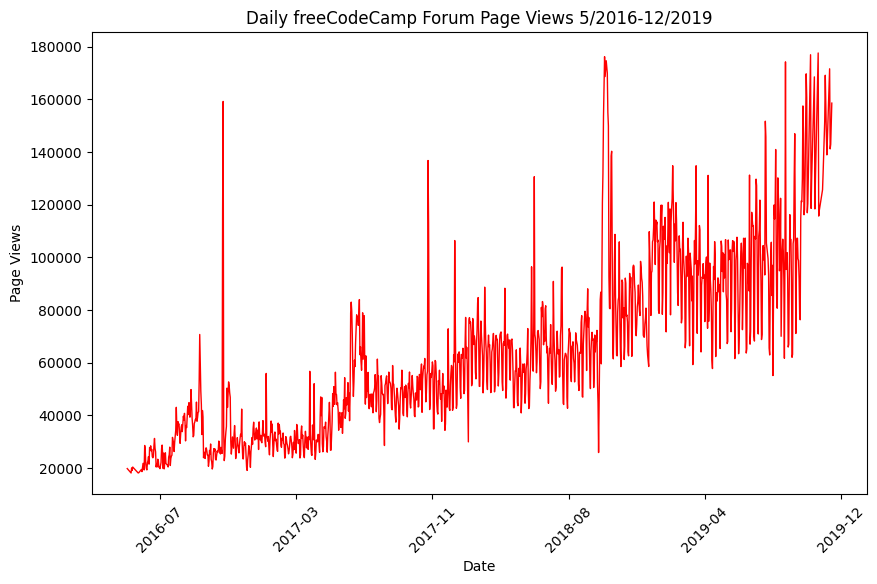

In [6]:
from matplotlib.dates import DateFormatter
dates = pd.to_datetime(f_data['date'])
fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the line chart
ax.plot(dates, f_data['value'], color='r', linewidth=1)

    # Set title and labels
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

ax.xaxis.set_major_locator(plt.MaxNLocator(6))

    # Set x-axis date format
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

    # Rotate x-axis labels for better readability
plt.xticks(rotation=45)

    # Save plot to file if needed
    # plt.savefig('line_plot.png', dpi=300, bbox_inches='tight')

    # Show plot
plt.show()




In [7]:
#saving plot
fig.savefig('lineplot.png')

BAR PLOT

In [11]:
df_bar = f_data.copy()

In [16]:
df_bar['date'] = pd.to_datetime(df_bar['date'])

df_bar['year'] = df_bar['date'].dt.year

df_bar['month'] = df_bar['date'].dt.month_name()

In [ ]:
# Create a pivot table to calculate the average page views for each month and year

In [17]:
df_bar = df_bar.pivot_table(index='year', columns=
                            'month', values='value' , aggfunc='mean')

In [18]:
#Assigning order

months = ['January', 'February', 'March', 'April', 'May', 'June' ,'July' ,
          'August' ,'September' ,'October' ,'November' ,'December']

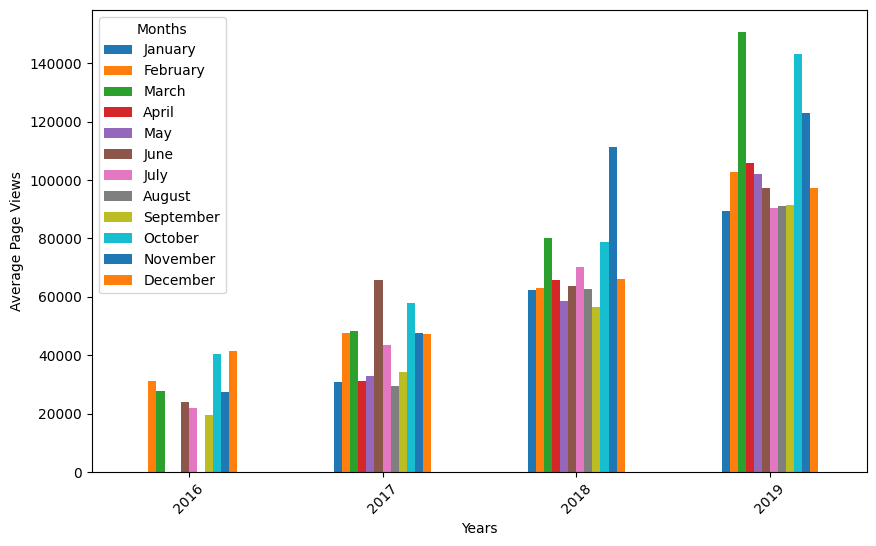

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
df_bar.plot(kind='bar', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(title='Months', labels=months)
plt.xticks(rotation=45)
plt.show()

In [20]:
fig.savefig('bar_plot.png')

BOX PLOT

In [22]:
df_box = df.copy()
df_box['date'] = pd.to_datetime(df_box['date'])
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

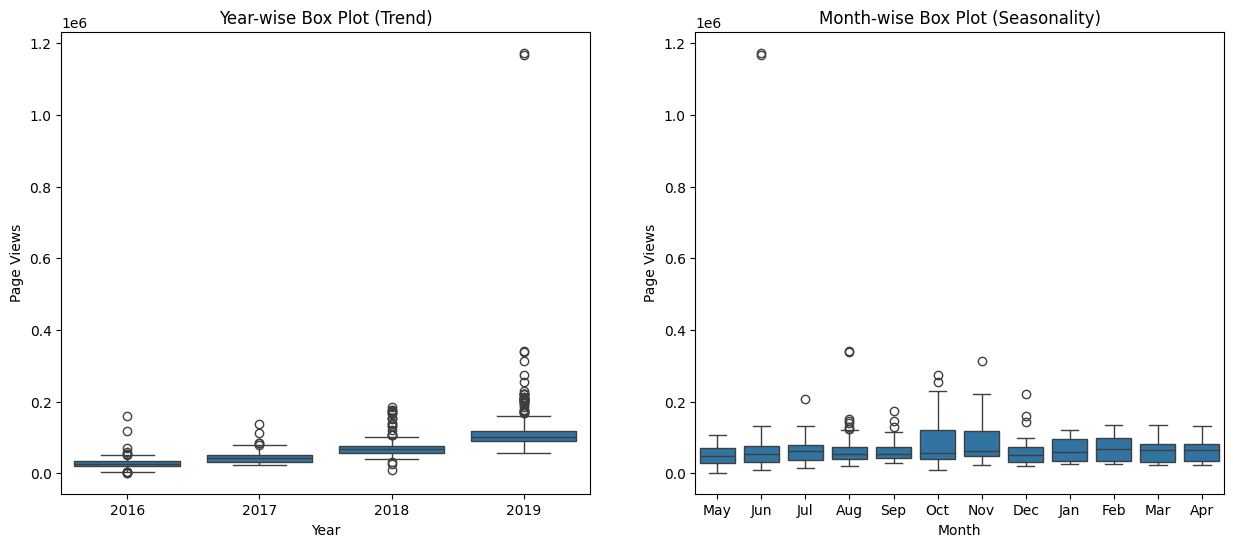

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

plt.show()

In [26]:
fig.savefig('box_plot.png')